In [1]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
df = pd.read_csv("Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

In [4]:
df['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [5]:
df2 = df.drop(['area_type','availability','balcony','society'],axis = 'columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [6]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [7]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [8]:
df3.shape

(13246, 5)

In [67]:
df3['bhk'] = df3['size'].apply(lambda x:int(x.split(' ')[0]))


C:\Users\acer\.anaconda\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [11]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [12]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [13]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True
        

In [14]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [15]:
def convert_sqft_to_num(x):
    tokens  = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1]))/2
                
    try:
        return float(x)
    except:
        return None

In [16]:
#Just above coding convert range of data in one singel data using average value of that range using function convert_sqft_to_num

In [17]:
convert_sqft_to_num("2100 - 2850")

2475.0

In [18]:
convert_sqft_to_num("34.46Sq. Meter")

In [19]:
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [20]:
df4.loc[30]#give location for using loc

location      Yelahanka
size              4 BHK
total_sqft         2475
bath                  4
price               186
bhk                   4
Name: 30, dtype: object

In [21]:
## data cleaning is end here 
#Now feature engineering for real estimate prediction for bengaluru house price data
#

In [22]:
df5 = df4.copy()

In [23]:
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [24]:
len(df5.location.unique())

1304

In [25]:
# The strip() method removes characters from both left and right based on the argument
df5.location = df5.location.apply(lambda x: x.strip())
#location_stats = df5.groupby('location')['location'].agg('count')
location_stats = df5.location.value_counts()
location_stats

Whitefield                              535
Sarjapur  Road                          392
Electronic City                         304
Kanakpura Road                          266
Thanisandra                             236
                                       ... 
Huttanahalli                              1
asha township, off hennur road            1
ravindra nagar, T.dasarahalli peenya      1
Kengeri Satellite Town KHB Apartment      1
Gokaula Extension                         1
Name: location, Length: 1293, dtype: int64

In [26]:
len(location_stats[location_stats<=10])

1052

In [27]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

Dodsworth Layout                        10
Nagappa Reddy Layout                    10
Sector 1 HSR Layout                     10
1st Block Koramangala                   10
Gunjur Palya                            10
                                        ..
Huttanahalli                             1
asha township, off hennur road           1
ravindra nagar, T.dasarahalli peenya     1
Kengeri Satellite Town KHB Apartment     1
Gokaula Extension                        1
Name: location, Length: 1052, dtype: int64

In [28]:
len(df5.location.unique())

1293

Here is one of the best way to for encoding categorical values where we give "other" name for such categorical values which 
repetation times is less than or equal to 10 and finally use get_dummies.

In [29]:
df5.location = df5.location.apply(lambda x: "other" if x in location_stats_less_than_10 else x)
len(df5.location.unique())

242

In [30]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [31]:
#project 4 for outlier removal 

In [32]:
df5[df5.total_sqft/df5.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [33]:
df5.shape

(13246, 7)

In [34]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]# with help of ~ we can find other than ~() in small brackets 
df6.shape      
#Negation: The not operator in Python can be used only in the unary form, 
#which means negation, returning the a result that is the opposite of its operand.


(12502, 7)

In [35]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [36]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m= np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[((subdf.price_per_sqft)>=(m -st)) & ((subdf.price_per_sqft)<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index = True)
    return df_out

df7 = remove_pps_outliers(df6)
df7.shape

(10241, 7)

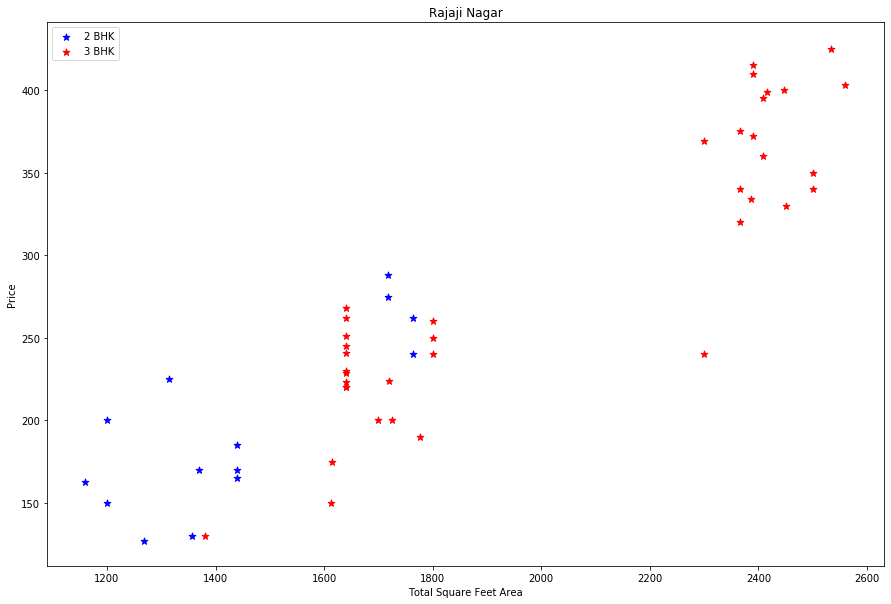

In [37]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,marker = "*",color = "b",label = '2 BHK',s = 50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker = "*",color = "r",label = '3 BHK',s = 50)      
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Rajaji Nagar")

Pandas dataframe.groupby() function is used to split the data into groups based on some criteria. pandas objects can be split on any of their axes. The abstract definition of grouping is to provide a mapping of labels to group names.

In [38]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location,location_df in df.groupby("location"):
        print(location,location_df)
        bhk_stats ={}
        for bhk,bhk_df in location_df.groupby("bhk"):
            bhk_stats[bhk] = {
                
                'mean' : np.mean(bhk_df.price_per_sqft),
                'std' : np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
            
        for bhk,bhk_df in location_df.groupby("bhk"):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
            
    return df.drop(exclude_indices,axis = 'index')

df8 = remove_bhk_outliers(df7)
df8.shape

1st Block Jayanagar               location   size  total_sqft  bath  price  bhk  price_per_sqft
0  1st Block Jayanagar  4 BHK      2850.0   4.0  428.0    4    15017.543860
1  1st Block Jayanagar  3 BHK      1630.0   3.0  194.0    3    11901.840491
2  1st Block Jayanagar  3 BHK      1875.0   2.0  235.0    3    12533.333333
3  1st Block Jayanagar  3 BHK      1200.0   2.0  130.0    3    10833.333333
4  1st Block Jayanagar  2 BHK      1235.0   2.0  148.0    2    11983.805668
5  1st Block Jayanagar  4 BHK      2750.0   4.0  413.0    4    15018.181818
6  1st Block Jayanagar  4 BHK      2450.0   4.0  368.0    4    15020.408163
1st Phase JP Nagar               location       size  total_sqft  bath  price  bhk  \
7   1st Phase JP Nagar      4 BHK      2825.0   4.0  250.0    4   
8   1st Phase JP Nagar      3 BHK      1875.0   3.0  167.0    3   
9   1st Phase JP Nagar  5 Bedroom      1500.0   5.0   85.0    5   
10  1st Phase JP Nagar      3 BHK      2065.0   4.0  210.0    3   
11  1st Phase JP N

Amruthahalli          location       size  total_sqft  bath  price  bhk  price_per_sqft
391  Amruthahalli      2 BHK       900.0   2.0   40.0    2     4444.444444
392  Amruthahalli      2 BHK      1200.0   2.0   55.0    2     4583.333333
393  Amruthahalli  3 Bedroom      1900.0   3.0  135.0    3     7105.263158
394  Amruthahalli      2 BHK       924.0   2.0   45.0    2     4870.129870
395  Amruthahalli      2 BHK       900.0   2.0   60.0    2     6666.666667
396  Amruthahalli      2 BHK      1100.0   2.0   45.0    2     4090.909091
397  Amruthahalli      2 BHK      1200.0   2.0   55.0    2     4583.333333
398  Amruthahalli      3 BHK      1350.0   2.0   63.0    3     4666.666667
399  Amruthahalli      3 BHK      1605.0   3.0   65.0    3     4049.844237
400  Amruthahalli      3 BHK      1700.0   3.0   77.0    3     4529.411765
401  Amruthahalli      3 BHK      1450.0   2.0   85.0    3     5862.068966
402  Amruthahalli      2 BHK      1200.0   2.0   55.0    2     4583.333333
403  Amrutha

Basaveshwara Nagar                location       size  total_sqft  bath  price  bhk  \
985  Basaveshwara Nagar  5 Bedroom      4500.0   5.0  415.0    5   
986  Basaveshwara Nagar      3 BHK      1865.0   3.0  145.0    3   
987  Basaveshwara Nagar      2 BHK      1200.0   2.0   90.0    2   
988  Basaveshwara Nagar  5 Bedroom      2400.0   4.0  310.0    5   
989  Basaveshwara Nagar      2 BHK      1200.0   2.0   80.0    2   
990  Basaveshwara Nagar      2 BHK       900.0   2.0   60.0    2   
991  Basaveshwara Nagar      3 BHK      1900.0   3.0  150.0    3   
992  Basaveshwara Nagar      2 BHK      1200.0   2.0   85.0    2   
993  Basaveshwara Nagar      2 BHK      1200.0   2.0   70.0    2   

     price_per_sqft  
985     9222.222222  
986     7774.798928  
987     7500.000000  
988    12916.666667  
989     6666.666667  
990     6666.666667  
991     7894.736842  
992     7083.333333  
993     5833.333333  
Battarahalli           location       size  total_sqft  bath   price  bhk  price

Dodda Nekkundi             location   size  total_sqft  bath   price  bhk  price_per_sqft
1776  Dodda Nekkundi  2 BHK      1260.0   2.0   55.00    2     4365.079365
1777  Dodda Nekkundi  2 BHK       850.0   2.0   28.00    2     3294.117647
1778  Dodda Nekkundi  2 BHK      1390.0   2.0   60.00    2     4316.546763
1779  Dodda Nekkundi  3 BHK      1804.0   3.0  121.00    3     6707.317073
1780  Dodda Nekkundi  2 BHK      1080.0   2.0   50.00    2     4629.629630
1781  Dodda Nekkundi  3 BHK      1999.0   3.0  132.00    3     6603.301651
1782  Dodda Nekkundi  2 BHK      1100.0   2.0   48.00    2     4363.636364
1783  Dodda Nekkundi  3 BHK      1999.0   3.0  135.00    3     6753.376688
1784  Dodda Nekkundi  2 BHK      1100.0   2.0   41.15    2     3740.909091
1785  Dodda Nekkundi  3 BHK      1252.0   2.0   71.00    3     5670.926518
1786  Dodda Nekkundi  2 BHK      1155.0   2.0   46.00    2     3982.683983
1787  Dodda Nekkundi  2 BHK      1128.0   2.0   45.00    2     3989.361702
1788  Dodd

HRBR Layout          location   size  total_sqft  bath  price  bhk  price_per_sqft
2538  HRBR Layout  2 BHK      1374.0   2.0   95.0    2     6914.119360
2539  HRBR Layout  2 BHK      1440.0   2.0   98.0    2     6805.555556
2540  HRBR Layout  3 BHK      1567.0   3.0   90.0    3     5743.458839
2541  HRBR Layout  3 BHK      2800.0   3.0  250.0    3     8928.571429
2542  HRBR Layout  2 BHK      1210.0   2.0   75.0    2     6198.347107
2543  HRBR Layout  2 BHK      1265.0   2.0   78.0    2     6166.007905
2544  HRBR Layout  2 BHK      1170.0   2.0   75.0    2     6410.256410
2545  HRBR Layout  3 BHK      1335.0   2.0   87.0    3     6516.853933
2546  HRBR Layout  4 BHK      1900.0   3.0   90.0    4     4736.842105
2547  HRBR Layout  3 BHK      1625.0   3.0  120.0    3     7384.615385
2548  HRBR Layout  2 BHK      1301.0   2.0  120.0    2     9223.674097
2549  HRBR Layout  2 BHK      1145.0   2.0   68.5    2     5982.532751
2550  HRBR Layout  2 BHK      1300.0   2.0   90.0    2     6923.0

Hulimavu       location       size  total_sqft  bath   price  bhk  price_per_sqft
3417  Hulimavu      2 BHK      1125.0   2.0   50.00    2     4444.444444
3418  Hulimavu      2 BHK      1242.0   2.0   51.00    2     4106.280193
3419  Hulimavu      3 BHK      1650.0   3.0   78.00    3     4727.272727
3420  Hulimavu      3 BHK      1823.0   3.0  100.00    3     5485.463522
3421  Hulimavu      2 BHK      1300.0   2.0   36.00    2     2769.230769
3422  Hulimavu      2 BHK      1080.0   2.0   43.20    2     4000.000000
3423  Hulimavu      2 BHK      1100.0   2.0   71.50    2     6500.000000
3424  Hulimavu      3 BHK      1758.0   3.0   65.00    3     3697.383390
3425  Hulimavu      1 BHK       688.0   1.0   50.00    1     7267.441860
3426  Hulimavu      2 BHK      1255.0   2.0   73.00    2     5816.733068
3427  Hulimavu  4 Bedroom      1200.0   4.0   75.00    4     6250.000000
3428  Hulimavu      2 BHK      1058.0   2.0   48.00    2     4536.862004
3429  Hulimavu      2 BHK      1375.0   2.

Kambipura        location   size  total_sqft  bath  price  bhk  price_per_sqft
3953  Kambipura  2 BHK       883.0   2.0  45.00    2     5096.262741
3954  Kambipura  3 BHK      1082.0   2.0  56.00    3     5175.600739
3955  Kambipura  2 BHK       883.0   2.0  45.00    2     5096.262741
3956  Kambipura  3 BHK      1082.0   2.0  45.00    3     4158.964880
3957  Kambipura  2 BHK       883.0   2.0  39.00    2     4416.761042
3958  Kambipura  2 BHK       883.0   2.0  45.00    2     5096.262741
3959  Kambipura  2 BHK       883.0   2.0  39.00    2     4416.761042
3960  Kambipura  3 BHK      1082.0   2.0  55.00    3     5083.179298
3961  Kambipura  3 BHK      1082.0   2.0  45.00    3     4158.964880
3962  Kambipura  2 BHK       883.0   2.0  37.00    2     4190.260476
3963  Kambipura  2 BHK       883.0   2.0  44.00    2     4983.012458
3964  Kambipura  2 BHK       883.0   2.0  37.00    2     4190.260476
3965  Kambipura  3 BHK      1082.0   2.0  45.50    3     4205.175601
3966  Kambipura  3 BHK  

Koramangala          location       size  total_sqft  bath  price  bhk  price_per_sqft
4535  Koramangala      2 BHK      1320.0   2.0  165.0    2    12500.000000
4536  Koramangala      2 BHK      1253.0   2.0  102.0    2     8140.462889
4537  Koramangala      3 BHK      1580.0   3.0  160.0    3    10126.582278
4538  Koramangala      3 BHK      1750.0   3.0  130.0    3     7428.571429
4539  Koramangala      4 BHK      3500.0   5.0  425.0    4    12142.857143
4540  Koramangala      2 BHK      1005.0   1.0  110.0    2    10945.273632
4541  Koramangala      3 BHK      2292.0   4.0  275.0    3    11998.254799
4542  Koramangala      3 BHK      1835.0   2.0  155.0    3     8446.866485
4543  Koramangala      2 BHK      1290.0   2.0  100.0    2     7751.937984
4544  Koramangala      2 BHK      1300.0   2.0  110.0    2     8461.538462
4545  Koramangala      3 BHK      2200.0   3.0  180.0    3     8181.818182
4546  Koramangala      2 BHK      1325.0   2.0  119.0    2     8981.132075
4547  Koraman

Murugeshpalya            location   size  total_sqft  bath  price  bhk  price_per_sqft
5136  Murugeshpalya  2 BHK      1296.0   2.0   81.0    2     6250.000000
5137  Murugeshpalya  3 BHK      1550.0   3.0   74.0    3     4774.193548
5138  Murugeshpalya  3 BHK      1845.0   3.0   91.0    3     4932.249322
5139  Murugeshpalya  2 BHK      1185.0   2.0   85.0    2     7172.995781
5140  Murugeshpalya  2 BHK      1225.0   2.0   48.0    2     3918.367347
5141  Murugeshpalya  3 BHK      1930.0   3.0   75.0    3     3886.010363
5142  Murugeshpalya  3 BHK      1600.0   2.0   65.0    3     4062.500000
5143  Murugeshpalya  3 BHK      1344.0   2.0   56.0    3     4166.666667
5144  Murugeshpalya  3 BHK      1500.0   2.0   70.0    3     4666.666667
5145  Murugeshpalya  3 BHK      1855.0   3.0   96.0    3     5175.202156
5146  Murugeshpalya  2 BHK      1175.0   2.0   75.0    2     6382.978723
Mysore Road          location   size  total_sqft  bath    price  bhk  price_per_sqft
5147  Mysore Road  2 BHK 

Rajaji Nagar           location       size  total_sqft  bath  price  bhk  price_per_sqft
5725  Rajaji Nagar      3 BHK      1640.0   3.0  229.0    3    13963.414634
5726  Rajaji Nagar      3 BHK      2390.0   3.0  415.0    3    17364.016736
5727  Rajaji Nagar      3 BHK      2390.0   3.0  410.0    3    17154.811715
5728  Rajaji Nagar      3 BHK      1725.0   3.0  200.0    3    11594.202899
5729  Rajaji Nagar      4 BHK      3516.0   4.0  540.0    4    15358.361775
...            ...        ...         ...   ...    ...  ...             ...
5790  Rajaji Nagar      3 BHK      2367.0   3.0  320.0    3    13519.222645
5791  Rajaji Nagar      3 BHK      2409.0   3.0  395.0    3    16396.845164
5792  Rajaji Nagar  2 Bedroom      1314.0   2.0  225.0    2    17123.287671
5793  Rajaji Nagar      2 BHK      1440.0   2.0  165.0    2    11458.333333
5794  Rajaji Nagar      3 BHK      1640.0   3.0  245.0    3    14939.024390

[70 rows x 7 columns]
Rajiv Nagar          location   size  total_sqft  ba

Sompura      location   size  total_sqft  bath  price  bhk  price_per_sqft
6439  Sompura  2 BHK       825.0   2.0   33.0    2     4000.000000
6440  Sompura  3 BHK      1025.0   2.0   37.0    3     3609.756098
6441  Sompura  2 BHK      1020.0   2.0   41.0    2     4019.607843
6442  Sompura  2 BHK      1126.0   2.0   39.0    2     3463.587922
6443  Sompura  2 BHK       825.0   2.0   32.0    2     3878.787879
6444  Sompura  3 BHK      1360.0   2.0   45.0    3     3308.823529
6445  Sompura  3 BHK      1350.0   2.0   47.0    3     3481.481481
6446  Sompura  4 BHK      2150.0   3.0   85.0    4     3953.488372
Sonnenahalli           location   size  total_sqft  bath   price  bhk  price_per_sqft
6447  Sonnenahalli  3 BHK      1415.0   2.0  55.000    3     3886.925795
6448  Sonnenahalli  2 BHK       896.0   2.0  43.750    2     4882.812500
6449  Sonnenahalli  2 BHK      1120.0   2.0  43.000    2     3839.285714
6450  Sonnenahalli  2 BHK      1100.0   2.0  44.000    2     4000.000000
6451  Sonne

(7329, 7)

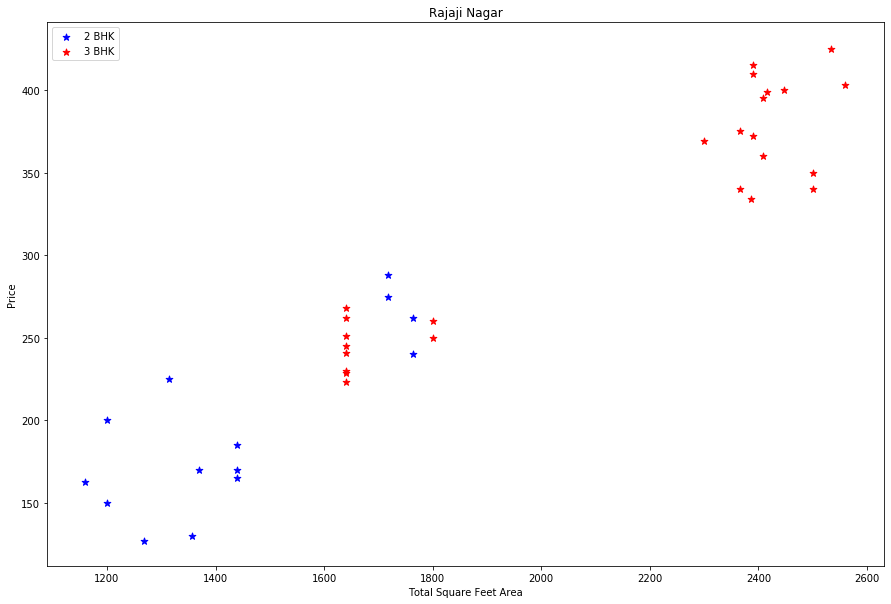

In [39]:
plot_scatter_chart(df8,"Rajaji Nagar")

Text(0, 0.5, 'Count')

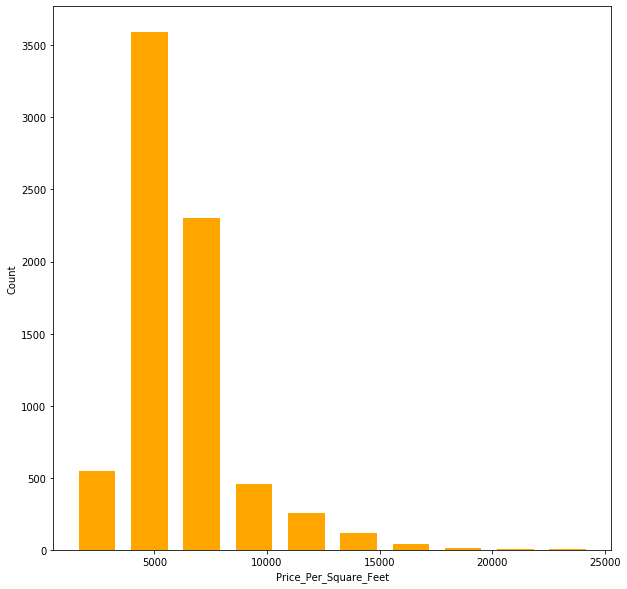

In [40]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10,10)
plt.hist(df8.price_per_sqft,rwidth = 0.7,color ="orange")
plt.xlabel("Price_Per_Square_Feet")
plt.ylabel("Count")



In [41]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [42]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


In [43]:
df9  =df8[~(df8.bath>=df8.bhk+2)]
df9.shape

(7251, 7)

In [44]:
df10 = df9.drop(["size","price_per_sqft"],axis = 'columns')
df10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


# Model Building

In [45]:
dummies = pd.get_dummies(df10.location)
dummies.head()


,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
df11 = pd.concat([df10,dummies.drop("other",axis = "columns")],axis = "columns")
df11.head()#to remove the dummy trap we have to remove last columns of dummies dataframe

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
df12 = df11.drop("location",axis = "columns")
df12.head(3)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
df12.shape

(7251, 245)

In [49]:
X = df12.drop("price",axis = "columns")
X.head(3)

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
y = df12.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 10)

In [52]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8452277697874312

In [53]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits = 5,test_size = 0.2,random_state = 0)
cross_val_score(LinearRegression(),X,y,cv = cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.818354,{'normalize': True}
1,lasso,0.687429,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.733884,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [55]:
 x = np.zeros(len(X.columns))
x[0]

0.0

In [56]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [57]:
np.where(X.columns=='5th Block Hbr Layout')[0][0]

7

In [58]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [59]:
predict_price('5th Block Hbr Layout',1000,3,3)

14.213949340149277

In [60]:
import pickle
with open("Banglore_home_price_model.pickel","wb") as f:
    pickle.dump(lr_clf,f)

In [61]:
with open("Banglore_home_price_model.pickel","rb") as f:
    load_model = pickle.load(f)

In [62]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

In [63]:
with open("columns.json","r") as f:
    f.read()